# Lunch time bootcamp for building 5

![EnergyBox_logo](resource\img\images_EnergyBox_logo.png)

## Modelling part  

![analysis_concept](resource\img\modelling.png)

## By the end of this lunch time bootcamp, people can do following
1. Get basic understanding of Grasshopper & python
2. Can use ghPython to write Python in Grasshopper
3. Understand the idea of Elefront

## 1. Get basic understanding of Grasshopper & python  
## 2. Can use ghPython to write Python in Grasshopper

We are familiar with excel. Lets start to understand python using following Jupyter Notebook and lecture  
Explanation Video : https://moodle.arup.com/mod/kalvidres/view.php?id=45474  
Jupyter Notebook : [Python scripting in Grasshopper](ref\session4\Session 4 - Scripting for Grasshopper and Dynamo.ipynb)    

## 3. Understand the idea of Elefront  
Elefront is being used in EnergyBox modelling part. Energy simulation file requires many attribute (Lighting, people, set point etc) to assosiated with geometry. Elefront is quite useful to store attribute into geometry.  
![elefront](resource\img\elefront.png)

Please go through videos in following video

Explanation Page : https://moodle.arup.com/course/view.php?id=2459&section=3

## Excercise
Calculate energy consumption for office part (office_open & office_close) for  [HKAA project](http://hkgaet105/project/1920/)

![excercise](resource\img\excercise.png)

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Reference

# API documentation page is from following link

http://hkgaet105:8080/ui

# Prepare functions

In [2]:
def replace_value(dict, value_to_find, value_to_replace):
    # This function is to replace specified value('\xa0') in dictionary
    for k, v in dict.items():
        for k1, v1 in v.items():
            if v1 == value_to_find:
                v[k1] = value_to_replace

            dict[k] = v

        return dict

def dict2df(dict, cols):
    raw_df = pd.DataFrame.from_dict(dict)
    df = raw_df.drop(raw_df.index[0])  # first row is duplicated with columns

    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

    return df

In [3]:
def getByKeyword(id,keyword):
    
    url='http://hkgaet105/project/api/'+str(id)+'/'+keyword
    r = requests.get(url)
    #print (r.json()[0])
    value=r.json()[0]["json"]
    raw_dict=replace_value(value,'\xa0',"")
    cols=list(raw_dict.keys())
    df=dict2df(raw_dict,cols)
    
    return df

# calculate cooling load intensity

In [22]:
opaque=getByKeyword(2159,"opaque")

In [28]:
light=getByKeyword(2159,"light")

In [29]:
light

,,Hours/Week > 1% [hr],Return Air Fraction,Zone,Scheduled Hours/Week [hr],Lighting Power Density [W/m2],Zone Area [m2],Schedule Name,Full Load Hours/Week [hr],Total Power [W],Consumption [kWh],Conditioned (Y/N),End Use Subcategory
13F_CONFERENCEOFFICELIGHTS,NaN,168.0,0.0,NaN,64.4,9.0000,655.19,NaN,64.4,5896.72,19801.09,NaN,NaN
13F_CONFERENCE_2OFFICELIGHTS,NaN,168.0,0.0,NaN,64.4,9.0000,655.20,NaN,64.4,5896.76,19801.25,NaN,NaN
13F_SUPPLEMENTARYOFFICELIGHTS,NaN,168.0,0.0,NaN,64.4,5.0000,337.94,NaN,64.4,1689.71,5674.02,NaN,NaN
1F_RETAILOFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,10.0000,655.20,NaN,77.0,6551.96,26306.03,NaN,NaN
1F_RETAIL_2OFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,10.0000,655.19,NaN,77.0,6551.91,26305.82,NaN,NaN
1F_SUPPLEMENTARYOFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,5.0000,337.94,NaN,77.0,1689.71,6784.16,NaN,NaN
2F_RETAILOFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,10.0000,655.19,NaN,77.0,6551.91,26305.82,NaN,NaN
2F_RETAIL_2OFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,10.0000,655.20,NaN,77.0,6551.96,26306.03,NaN,NaN
2F_SUPPLEMENTARYOFFICELIGHTS,NaN,168.0,0.0,NaN,77.0,5.0000,337.94,NaN,77.0,1689.71,6784.16,NaN,NaN
3F_CONFERENCEOFFICELIGHTS,NaN,168.0,0.0,NaN,64.4,9.0000,655.19,NaN,64.4,5896.72,19801.09,NaN,NaN


In [26]:
wwr=getByKeyword(2159,"wwr")

In [27]:
wwr

,,North (315 to 45 deg),Total,West (225 to 315 deg),East (45 to 135 deg),South (135 to 225 deg)
Above Ground Wall Area [m2],NaN,2764.82,11005.12,2737.73,2737.77,2764.8
Above Ground Window-Wall Ratio [%],NaN,50.00,50.00,50.00,50.00,50.0
Gross Wall Area [m2],NaN,2764.82,11005.12,2737.73,2737.77,2764.8
Gross Window-Wall Ratio [%],NaN,50.00,50.00,50.00,50.00,50.0
Window Opening Area [m2],NaN,1382.41,5502.56,1368.87,1368.89,1382.4


In [24]:
glass=getByKeyword(2159,"glass")

In [25]:
glass

,,Glass Area [m2],Divider Area [m2],Area of Multiplied Openings [m2],Glass SHGC,Glass Visible Transmittance,Construction,Frame Area [m2],Divider Conductance [W/m2-K],Parent Surface,Area of One Opening [m2],Frame Conductance [W/m2-K],Shade Control,Azimuth [deg],Cardinal Direction,Tilt [deg],Glass U-Factor [W/m2-K]
13F_CONFERENCE_10_GLZ_0_4BE827EF8A274368B025,NaN,44.40,0.0,44.40,0.702,0.701,NaN,0.0,NaN,NaN,44.40,NaN,NaN,119.98,NaN,90.0,1.6
13F_CONFERENCE_11_GLZ_0_CEEDFC32E0B543E08EF0,NaN,58.00,0.0,58.00,0.702,0.701,NaN,0.0,NaN,NaN,58.00,NaN,NaN,29.98,NaN,90.0,1.6
13F_CONFERENCE_1_GLZ_0_D8F7EF7FF8B6498E9CE9,NaN,57.00,0.0,57.00,0.702,0.701,NaN,0.0,NaN,NaN,57.00,NaN,NaN,119.98,NaN,90.0,1.6
13F_CONFERENCE_2_10_GLZ_0_757D2FBEF02B44B087DA,NaN,80.40,0.0,80.40,0.702,0.701,NaN,0.0,NaN,NaN,80.40,NaN,NaN,209.98,NaN,90.0,1.6
13F_CONFERENCE_2_11_GLZ_0_7AFD9BF409994ED9A03E,NaN,22.00,0.0,22.00,0.702,0.701,NaN,0.0,NaN,NaN,22.00,NaN,NaN,299.98,NaN,90.0,1.6
13F_CONFERENCE_2_1_GLZ_0_022CF6008355498FAFA3,NaN,22.00,0.0,22.00,0.702,0.701,NaN,0.0,NaN,NaN,22.00,NaN,NaN,209.98,NaN,90.0,1.6
13F_CONFERENCE_2_2_GLZ_0_41348410A1C44EFEA655,NaN,79.40,0.0,79.40,0.702,0.701,NaN,0.0,NaN,NaN,79.40,NaN,NaN,299.98,NaN,90.0,1.6
13F_CONFERENCE_2_GLZ_0_7B7AD1E63EB741518F72,NaN,44.40,0.0,44.40,0.702,0.701,NaN,0.0,NaN,NaN,44.40,NaN,NaN,29.98,NaN,90.0,1.6
1F_RETAIL_10_GLZ_0_0239974FC2764C9A85BD,NaN,100.50,0.0,100.50,0.702,0.701,NaN,0.0,NaN,NaN,100.50,NaN,NaN,209.98,NaN,90.0,1.6
1F_RETAIL_11_GLZ_0_1710EC2ED3794B44B11F,NaN,27.50,0.0,27.50,0.702,0.701,NaN,0.0,NaN,NaN,27.50,NaN,NaN,299.98,NaN,90.0,1.6


In [23]:
opaque

,,Gross Area [m2],U-Factor no Film [W/m2-K],Cardinal Direction,Net Area [m2],U-Factor with Film [W/m2-K],Azimuth [deg],Reflectance,Construction,Tilt [deg]
13F_CONFERENCE_1,NaN,114.00,0.426,NaN,57.00,0.401,119.98,0.3,NaN,90.0
13F_CONFERENCE_10,NaN,88.80,0.426,NaN,44.40,0.401,119.98,0.3,NaN,90.0
13F_CONFERENCE_11,NaN,116.00,0.426,NaN,58.00,0.401,29.98,0.3,NaN,90.0
13F_CONFERENCE_12,NaN,655.19,1.473,NaN,655.19,1.225,209.98,0.3,NaN,0.0
13F_CONFERENCE_2,NaN,88.80,0.426,NaN,44.40,0.401,29.98,0.3,NaN,90.0
13F_CONFERENCE_2_1,NaN,44.00,0.426,NaN,22.00,0.401,209.98,0.3,NaN,90.0
13F_CONFERENCE_2_10,NaN,160.80,0.426,NaN,80.40,0.401,209.98,0.3,NaN,90.0
13F_CONFERENCE_2_11,NaN,44.00,0.426,NaN,22.00,0.401,299.98,0.3,NaN,90.0
13F_CONFERENCE_2_12,NaN,655.20,1.473,NaN,655.20,1.225,209.98,0.3,NaN,0.0
13F_CONFERENCE_2_2,NaN,158.80,0.426,NaN,79.40,0.401,299.98,0.3,NaN,90.0


In [ ]:
energy=getByKeyword(2159,"energy")

In [10]:
energy["kgCO2"]=energy["Electricity [kWh]"]*0.7

In [13]:
energy["kgCO2"].sum()

1832314.8059999999

In [14]:
def kgCO2(id):
    energy=getByKeyword(id,"energy")
    #add natural gas and distict coolingf
    energy["kgCO2"]=energy["Electricity [kWh]"]*0.7
    co2=energy["kgCO2"].sum()
    
    return co2

In [16]:
propossed=kgCO2(2159)

In [17]:
baseline=kgCO2(2158)

In [20]:
def saving(b_ressult,p_result):
    saving=(1-p_result/b_ressult)*100
    return saving

In [21]:
saving(baseline,propossed)

17.93597237062896

# plot chiller operation as histogram

In [23]:
r = requests.get('http://hkgaet105/project/api/time/1045/Chiller_COP')
value=r.json()[0]["values"]
COP=[]
for obj in value:
    temp=obj["y"]
    COP.append(temp)

(array([  20.,  110.,   22.,   28.,  350., 3123.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

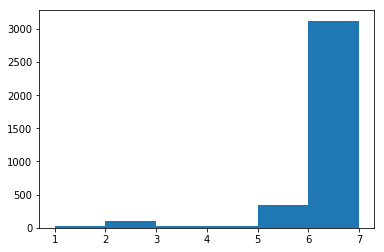

In [24]:
plt.hist(COP,bins=[1,2,3,4,5,6,7])